# Clasificación de peces

El siguiente análisis modela una clasificación por clustering de una muestra de peces de diversas especies según sus dimensiones. El dataset utilizado se encuentra disponible en https://www.kaggle.com/aungpyaeap/fish-market?select=Fish.csv.

### Carga de librerías

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.cluster import AgglomerativeClustering, KMeans
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist

### Carga de dataset

In [2]:
df = pd.read_csv("./Fish.csv")
df.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


In [3]:
df.shape

(159, 7)

In [4]:
target = "Species"
categories = len(df[target].unique())

(array([35., 20.,  6., 11., 56., 17., 14.]),
 array([0., 1., 2., 3., 4., 5., 6., 7.]),
 <BarContainer object of 7 artists>)

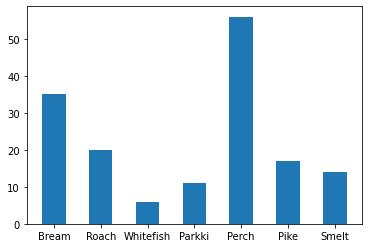

In [5]:
plt.hist(df[target], range=(0, categories), bins=categories, rwidth=0.5, align="left")

In [6]:
df.groupby(target).mean()

,Weight,Length1,Length2,Length3,Height,Width
Species,,,,,,
Bream,617.828571,30.305714,33.108571,38.354286,15.183211,5.427614
Parkki,154.818182,18.727273,20.345455,22.790909,8.962427,3.220736
Perch,382.239286,25.735714,27.892857,29.571429,7.861870,4.745723
Pike,718.705882,42.476471,45.482353,48.717647,7.713771,5.086382
Roach,152.050000,20.645000,22.275000,24.970000,6.694795,3.657850
Smelt,11.178571,11.257143,11.921429,13.035714,2.209371,1.340093
Whitefish,531.000000,28.800000,31.316667,34.316667,10.027167,5.473050


El dataset posee 159 muestras y 7 columnas. La variable objetivo presenta 7 categorías diferentes.

### Normalización de datos

In [7]:
num_vars = [x for x in df.columns.values if (x != target)]
df_str = df[target]
df_num = df[num_vars]
df_num_norm = (df_num-df_num.min()) / (df_num.max()-df_num.min())
df_norm = pd.concat([df_str, df_num_norm], axis = 1)
df_norm.head()

,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978
1,Bream,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235
2,Bream,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279
3,Bream,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365
4,Bream,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004


### Declaración de variables predictoras y target

In [8]:
predictoras = [x for x in df.columns.values if x not in target]

x = df_norm[predictoras]
y = df_norm[target]

### Modelado (3 métodos)

In [9]:
# SciPy

# Métodos: single, complete, average, weighted, centroid, median, ward

z = linkage(x, "centroid")

c, coph_dist = cophenet(z, pdist(x))
print("El coeficiente de correlación cofenético es del {c:.2f}%".format(c=c*100))

El coeficiente de correlación cofenético es del 76.95%


<function matplotlib.pyplot.show(close=None, block=None)>

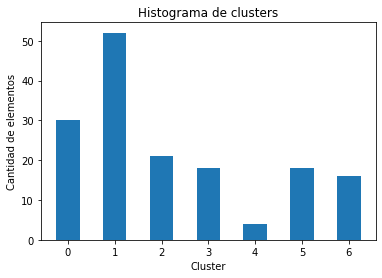

In [10]:
# SKLearn - AgglomerativeClustering

# Métodos: ward, complete, average, single

clusters = AgglomerativeClustering(n_clusters=categories, linkage="ward").fit(x)

pred = AgglomerativeClustering(n_clusters=categories, linkage="ward").fit_predict(x)


HLabel = pd.Series(clusters.labels_)

plt.hist(HLabel, range=(0, categories), bins=categories, rwidth=0.5, align="left")
plt.title("Histograma de clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de elementos")
plt.show

[4 4 4 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 2 2 2 2 2 2 5 1
 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 4 4 4 4 4 4 0 2 2 1 1 1 1 1 1 1 1 4 4 4 5 5
 5 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 4 1 4 4 4 4 4 4 4 4 4 0 0
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 4 3 3 3 3 3 3 3 3 3 3 3 6 6 6 6 6 5 5 5
 5 5 5 5 5 5 5 5 5 5 5]


<function matplotlib.pyplot.show(close=None, block=None)>

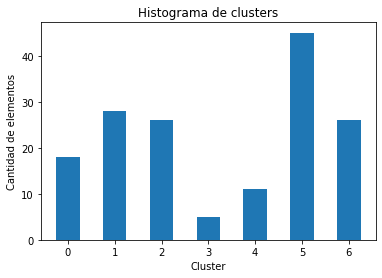

In [11]:
# SKLearn - K-Means

model = KMeans(n_clusters=7)
model.fit(x)
KMLabel = pd.Series(model.labels_)

pred = model.fit_predict(x)
print(pred)

plt.hist(KMLabel, range=(0, 7), bins=7, rwidth=0.5, align="left")
plt.title("Histograma de clusters")
plt.xlabel("Cluster")
plt.ylabel("Cantidad de elementos")
plt.show

### Incorporación de predicciones a dataset

In [12]:
df_pred = df_norm
df_pred["clust_h"] = HLabel
df_pred["clust_k"] = KMLabel
df_pred.head()

,Species,Weight,Length1,Length2,Length3,Height,Width,clust_h,clust_k
0,Bream,0.146667,0.304854,0.309091,0.358108,0.568334,0.418978,6,2
1,Bream,0.175758,0.320388,0.325455,0.378378,0.624055,0.459235,6,2
2,Bream,0.206061,0.318447,0.329091,0.376689,0.618123,0.514279,6,2
3,Bream,0.220000,0.365049,0.374545,0.417230,0.638566,0.480365,6,1
4,Bream,0.260606,0.368932,0.374545,0.425676,0.621966,0.576004,6,1


### Representación gráfica en dendrograma

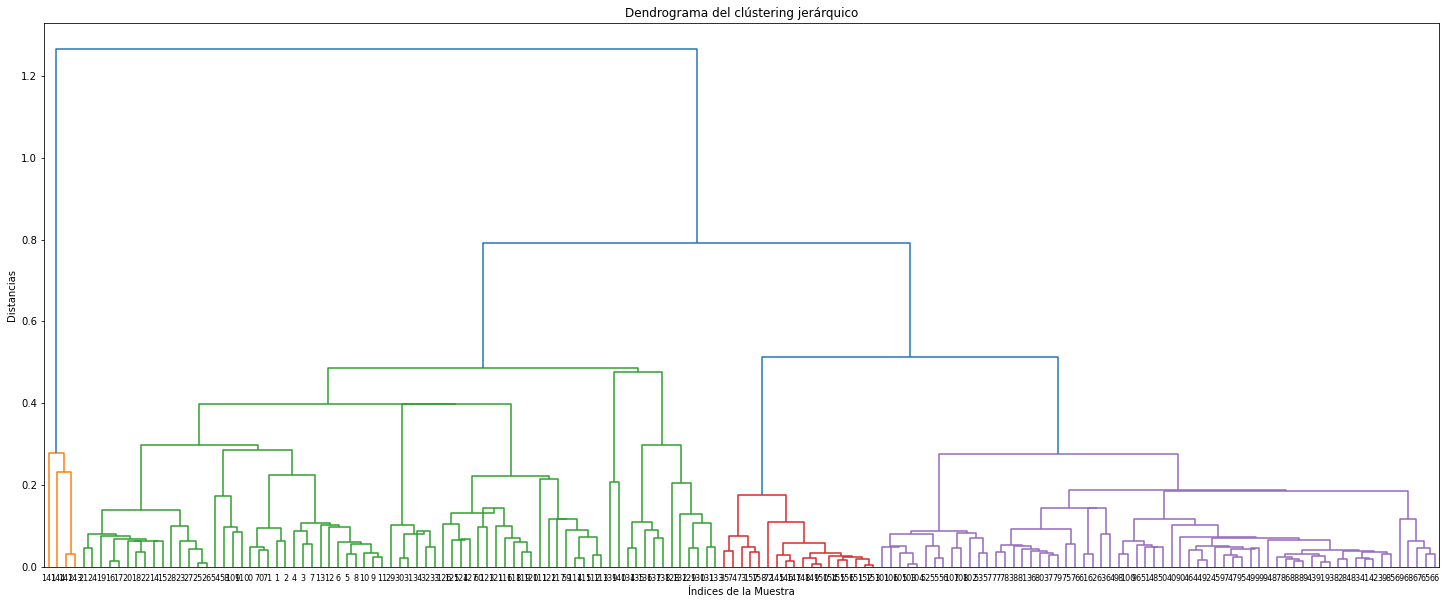

In [13]:
max_dist = z[-1, 2]
threshold = 0.4

plt.figure(figsize = (25, 10))
plt.title("Dendrograma del clústering jerárquico")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=0., leaf_font_size=8, color_threshold=(max_dist*threshold))
plt.show()

### Truncamiento del dendrograma

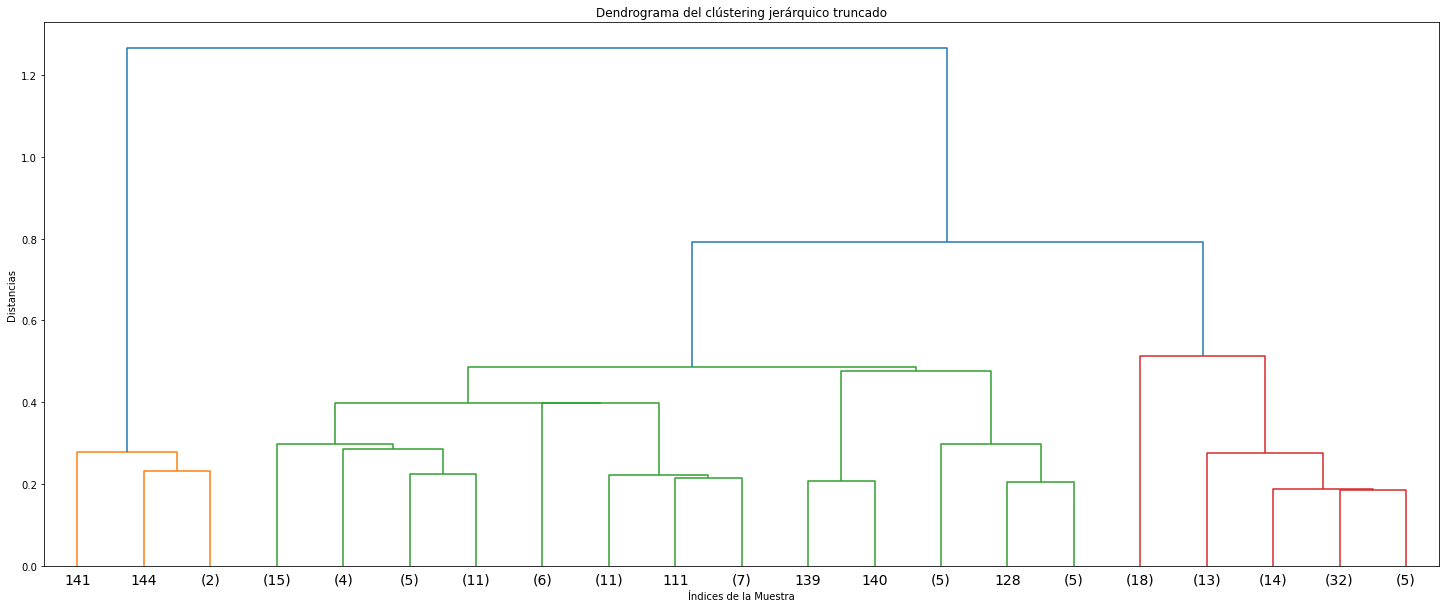

In [14]:
max_dist = z[-1, 2]
threshold = 0.5
p = 21

plt.figure(figsize = (25, 10))
plt.title("Dendrograma del clústering jerárquico truncado")
plt.xlabel("Índices de la Muestra")
plt.ylabel("Distancias")
dendrogram(z, leaf_rotation=0., leaf_font_size=14, color_threshold=(max_dist*threshold),
           truncate_mode="lastp", p=p)
plt.show()

### Método del codo

[1.26602907 0.79179524 0.51410178 0.4858192  0.47668042 0.39815891
 0.39793071 0.29739728 0.29733545 0.28451844]
El número óptimo de clusters según el métod0 del codo es de 3


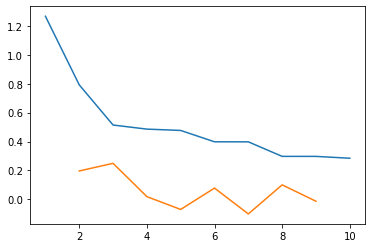

In [15]:
last = z[-10:,2]
last_rev = last[::-1]
idx = np.arange(1, len(last)+1)
print(last_rev)

plt.plot(idx, last_rev)

acc = np.diff(last_rev, 2)
k = acc.argmax() +2
print("El número óptimo de clusters según el métod0 del codo es de %s"%str(k))

plt.plot(idx[:-2]+1, acc)
plt.show()

### Recuperación de clusters y de sus elementos

In [16]:
distancia_maxima = 0.7

clusters = fcluster(z, distancia_maxima, criterion="distance")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 3, 3, 3, 2, 2, 2, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3], dtype=int32)

In [17]:
clusters_maximos = 7

clusters = fcluster(z, clusters_maximos, criterion="maxclust")
clusters

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 6, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2, 7, 7, 7, 2, 3, 3, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 2, 2, 6, 6, 6, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7,
       7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 7, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 5, 5, 5, 5,
       5, 5, 5, 5, 5, 5, 5, 4, 4, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6,
       6, 6, 6, 6, 6], dtype=int32)

## Interpretación final

In [18]:
df_pred.groupby("clust_k").mean()

,Weight,Length1,Length2,Length3,Height,Width,clust_h
clust_k,,,,,,,
0,0.009239,0.074757,0.067576,0.074887,0.043310,0.062739,3.000000
1,0.341710,0.431831,0.436494,0.481540,0.726967,0.610705,3.357143
2,0.157110,0.333757,0.333706,0.347128,0.395962,0.463021,3.923077
3,0.848485,0.907961,0.905818,0.901351,0.475750,0.780506,3.200000
4,0.276474,0.597176,0.590744,0.592445,0.300395,0.495207,2.272727
5,0.072316,0.223732,0.224727,0.233371,0.267529,0.322692,1.000000
6,0.539510,0.561090,0.561888,0.571271,0.680353,0.822596,0.538462


In [19]:
df_norm.groupby(target).mean()

,Weight,Length1,Length2,Length3,Height,Width,clust_h,clust_k
Species,,,,,,,,
Bream,0.374442,0.442829,0.449247,0.499228,0.780958,0.617390,3.600000,2.085714
Parkki,0.093829,0.218005,0.217190,0.236333,0.419885,0.306317,1.909091,4.181818
Perch,0.231660,0.354092,0.354416,0.350869,0.356005,0.521274,1.267857,4.357143
Pike,0.435579,0.679155,0.674225,0.674285,0.347409,0.569292,2.705882,3.588235
Roach,0.092152,0.255243,0.252273,0.273142,0.288265,0.367931,1.450000,3.850000
Smelt,0.006775,0.072954,0.064026,0.071549,0.027917,0.041229,3.000000,0.000000
Whitefish,0.321818,0.413592,0.416667,0.431025,0.481685,0.623795,2.500000,3.166667
